In [1]:
import sys 
sys.path.append("..")

from Island import Island
from Analyzer import Analyzer, Tracer

import pandas as pd
import numpy as np

import networkx as nx
import nxviz as nv

import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
island = Island.load_from_pickle("../data/Dec/11_23-19/1.pkl")
analyzer = Analyzer(island)

FileNotFoundError: [Errno 2] No such file or directory: '../data/Nov/20_16-19/1120.pkl'

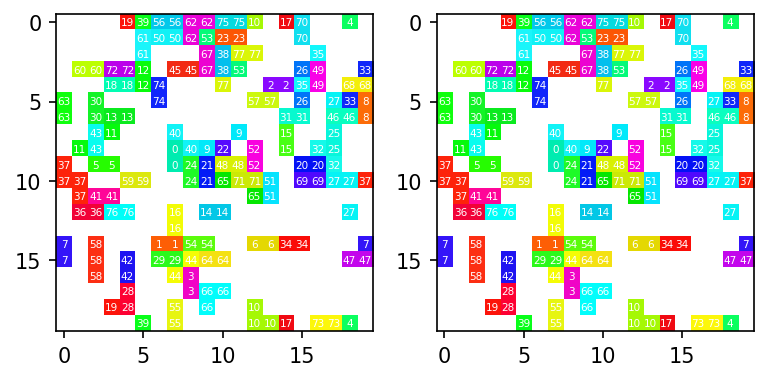

In [3]:
island.land.plot()

In [16]:
island.print_status(
    action=True,
)

##################### 36 #####################
===================== 攻击 =====================
	Aime(6) --50.6-> Miriam(141)
	Criselda(120) --61.6-> Yuri(142)
	Criselda(120) --56.8-> Miriam(141)
===================== 给予 =====================
==================== 给予土地 ====================
	Hasan(139) --1.0-> Criselda(120)
	Miriam(141) --1.0-> Criselda(120)
	Yuri(142) --1.0-> Miriam(141)
本轮出生：[]
本轮死亡：[Yuri(142), Miriam(141)]
本轮总给予：0.0
本轮总攻击：169.0
本轮总产量：200.9
本轮总消耗：99.0
	 ID Sur_ID  姓名          年龄   血量    仓库    土地数
	[6, 0] Aime:         67,   100.0,   553.7   37(9.2%)
	[69, 1] Jaryd:        64,   100.0,   708.5   37(9.2%)
	[120, 2] Criselda:     31,   100.0,   172.8   43(10.8%)
	[139, 3] Hasan:        4,   98.9,   21.4   5(1.2%)



In [10]:
clear_graph = analyzer.clear_graph()

In [37]:
len(clear_graph.nodes)

41

(array([ 2., 12., 12.,  8.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
        5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <BarContainer object of 20 artists>)

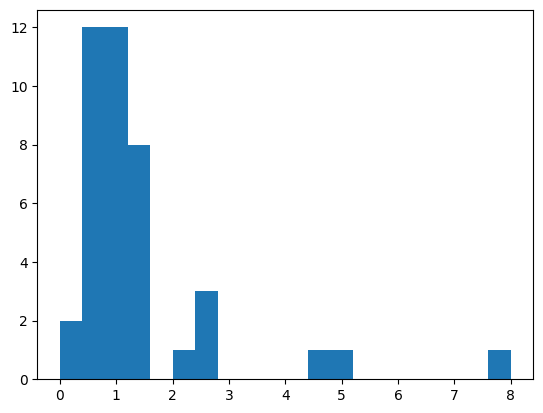

In [38]:
degree = np.array(list(dict(clear_graph.degree).values())) / 2
plt.hist(degree, bins=20)

In [39]:
island.land.shape

(30, 30)

(array([27.,  7.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. ]),
 <BarContainer object of 20 artists>)

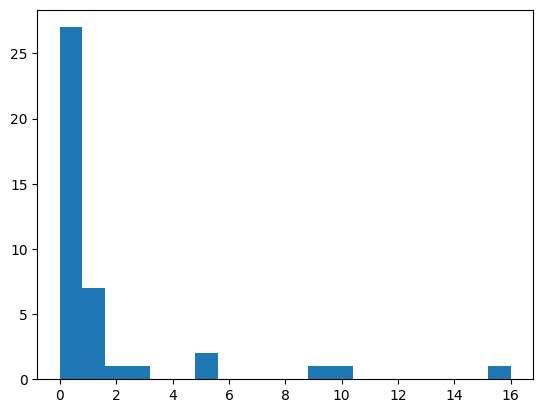

In [40]:
degree = [len(list(clear_graph.neighbors(n))) for n in clear_graph.nodes()]
plt.hist(degree, bins=20)


In [41]:
analyzer.clear_degree()

TypeError: 'DiGraph' object is not callable

/Users/Harry/opt/miniconda3/envs/arm30/lib/python3.10/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


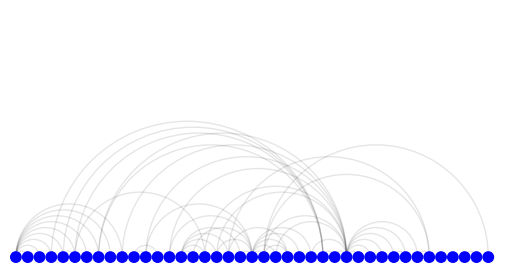

In [42]:
# fig, axs = plt.subplots(1, 2)
nv.ArcPlot(clear_graph)
# nx.draw(clear_graph, with_labels=True)
plt.show()